<a href="https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/4_3_Higher_Order_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.3 Higher Order Markov Chains
In this notebook we'll learn how extend the previous code to work with Markov chains of *higher order*.

## Setup

In [0]:
# install external libraries for sound playback
from IPython.display import clear_output
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
clear_output()

In [3]:
# imports
import mai
import random

Using TensorFlow backend.


## Learn transitions
This time we are going to learn a third order transition table. Conceptually, *order* specifies how far back the Markov chain looks when considering what to do next. In terms of numerical formalization, when order is greater than 1, the previous state is represented not as a single value but as a list of values. Order is the number of items in that list.

Example sequence to train on

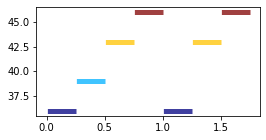

In [4]:
# sequence to learn
music = [36, 39, 43, 46, 36, 43, 46]

# plot it
mai.make_music_plot(music, durs=0.25, figsize=(4,2))

# play it
mai.make_music(music, durs=0.25, is_drum=True)

Learn a third order Markov chain by passing the argument `order=3` when you call the function `train`

In [0]:
# create a new markov chain 
mark = mai.markov.Markov()

# learn a table
mark.train(music, order=3) # <-- increase the value of order here!!!

View the transition table. Note that the previous state is represented as a list of numbers. For instance, the transition table entry `((36, 39, 43), 46): 1` means we that the sequence ``(36, 39, 43)`` is followed by the number `46` once.

In [6]:
# view the transition table
mark.transitions

{((36, 39, 43), 46): 1,
 ((39, 43, 46), 36): 1,
 ((43, 46, 36), 43): 1,
 ((46, 36, 43), 46): 1}

## Generate a new sequence
This works pretty much the same as order 1 EXCEPT our initial state must now be a list of three values

In [7]:
# set initial state
mark.state = (36, 39, 43)

# next choice
mark.choose()

46

Keep choosing

In [10]:
# next choice
mark.choose()

46

Generate all at once.

In [11]:
# set initial state
mark.state = (36, 39, 43)

# generate a new sequence
music = mark.choice(k=16)

# let's see it
mai.make_music_plot(music, durs=0.25, figsize=(4,2))

# let's hear it
mai.make_music(music, durs=0.25, is_drum=True)

LookupError: ignored

Two last points here:

1. Ouch, there's that error `LookupError: Current state not found in transition table`. OK, I'm tired of seeing that, so what can we do? You can suppress it using the argument `suppress_errors=True`. Super important point here: when the Markov chain reaches a state from which there is no possible transition, it now makes a random choice. Just be aware of this behavior, as it may change how you reason about the results of the generative process.


2. When you train the Markov model using the function `.train()` it automatically sets the current state to the initial state of the training sequence. So, we can omit the line of code where we set the initial state. This comes in handy when working with higher order Markov chains.

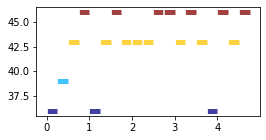

In [12]:
# create a new markov chain 
mark = mai.markov.Markov()

# learn table
mark.train(music, order=3)

# generate a new sequence
music = mark.choice(k=16, suppress_errors=True)

# let's see it
mai.make_music_plot(music, durs=0.25, figsize=(4,2))

# let's hear it
mai.make_music(music, durs=0.25, is_drum=True)